# HDBSCAN

In [ ]:
!pip install hdbscan

   ---------------------------------------- 811.2/811.2 kB 5.8 MB/s eta 0:00:00


In [1]:
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
from sklearn.base import BaseEstimator, clone
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.utils.metaestimators import available_if
from sklearn.utils.validation import check_is_fitted

def plot_scatter(X, color, alpha=0.5):
    return plt.scatter(X[:, 0], X[:, 1], c=color, alpha=alpha, edgecolor="k")

Text(0.5, 1.0, 'Unknown instances')

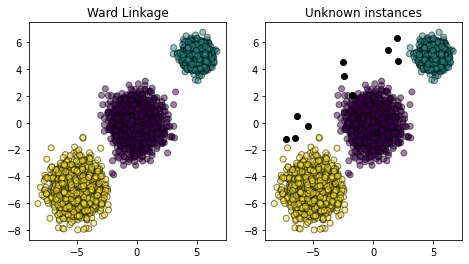

In [3]:
#Data
n_cluster = 3
N_SAMPLES = 5000
RANDOM_STATE = 42
X, y = make_blobs(
    n_samples=N_SAMPLES,
    cluster_std=[1.0, 1.0, 0.5],
    centers=[(-5, -5), (0, 0), (5, 5)],
    random_state=RANDOM_STATE,
)

# Train a clustering algorithm on the training data and get the cluster labels
clusterer = AgglomerativeClustering(n_clusters=n_cluster)
cluster_labels = clusterer.fit_predict(X)

plt.figure(figsize=(12, 4))

plt.subplot(131)
plot_scatter(X, cluster_labels)
plt.title("Ward Linkage")

# Generate new samples and plot them along with the original dataset
X_new, y_new = make_blobs(
    n_samples=10, centers=[(-7, -1), (-2, 4), (3, 6)], random_state=RANDOM_STATE
)

plt.subplot(132)
plot_scatter(X, cluster_labels)
plot_scatter(X_new, "black", 1)
plt.title("Unknown instances")

Text(0.5, 1.0, 'Ward Linkage')

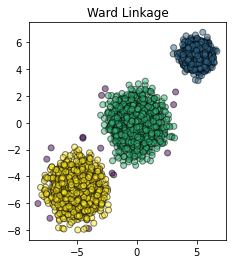

In [4]:
#Data drift, hdbscan
# Aplicar HDBSCAN
clusterer = hdbscan.HDBSCAN(min_samples=10, min_cluster_size=20)
clusterer.fit(X)

# Obtener las etiquetas de los clusters
labels = clusterer.labels_
plt.figure(figsize=(12, 4))
plt.subplot(131)
plot_scatter(X, labels)
plt.title("Ward Linkage")